In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [28]:
print(os.getcwd())

C:\Users\Neha\Desktop\3-2\Project4


In [29]:
data=pd.read_csv('C:/Users/Neha/Desktop/3-2/MP4//data.csv',encoding="ISO-8859-15")

In [30]:
data.shape

(435742, 13)

In [31]:
##data.fillna(0, inplace=True)
data.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


## preprocessing the data
Here we are going to keep only the needed columns
i.e removing stn_code,agency,location_monitoring_station,pm2_5

In [32]:

data = data[['sampling_date','state','location','so2','no2','date']]

In [33]:
#removing any rows with NaN type od date
data = data.dropna()

In [34]:
data.head()

,sampling_date,state,location,so2,no2,date
0,February - M021990,Andhra Pradesh,Hyderabad,4.8,17.4,1990-02-01
1,February - M021990,Andhra Pradesh,Hyderabad,3.1,7.0,1990-02-01
2,February - M021990,Andhra Pradesh,Hyderabad,6.2,28.5,1990-02-01
3,March - M031990,Andhra Pradesh,Hyderabad,6.3,14.7,1990-03-01
4,March - M031990,Andhra Pradesh,Hyderabad,4.7,7.5,1990-03-01


NameError: name 'sampling_date' is not defined

From here we start our calculation of Air Quality Index for the gases:
1. SO2
2. NO2

### What is sulfur dioxide?

Sulfur dioxide is a gas. It is invisible and has a nasty, sharp smell. It reacts easily with other substances to form harmful compounds, such as sulfuric acid, sulfurous acid and sulfate particles.

About 99% of the sulfur dioxide in air comes from human sources. The main source of sulfur dioxide in the air is industrial activity that processes materials that contain sulfur, eg the generation of electricity from coal, oil or gas that contains sulfur. Some mineral ores also contain sulfur, and sulfur dioxide is released when they are processed. In addition, industrial activities that burn fossil fuels containing sulfur can be important sources of sulfur dioxide.

Sulfur dioxide is also present in motor vehicle emissions, as the result of fuel combustion. In the past, motor vehicle exhaust was an important, but not the main, source of sulfur dioxide in air. However, this is no longer the case.

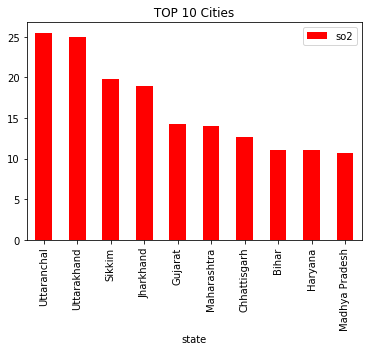

In [38]:
data[['so2','state']].groupby(["state"]).median().sort_values(by='so2',ascending=False).head(10).plot.bar(color='r' , title = ' TOP 10 Cities ')
plt.show()

In [39]:
#function for calculating the AQI base on the concentration of SO2
def AQIForSO2(so2):
    if(0<=so2 and so2<=40):
        I = ((50*so2)/(40))
    elif(41<=so2 and so2<=80):
        I = (((100-51)*(so2-41))/(80-41))+51
    elif(81<=so2 and so2<=380):
        I = (((200-101)*(so2-81))/(380-81))+101
    elif(381<=so2 and so2<=800):
        I = (((300-201)*(so2-381))/(800-381))+201
    elif(801<=so2 and so2<=1600):
        I = (((400-301)*(so2-801))/(1600-801))+301
    else:
        I = (((500-401)*(so2-1600))/(1600))+401
    return I

In [40]:
#including SI column in dataset
data['si']=data['so2'].apply(AQIForSO2)
df= data[['so2','si']]
df.head()


,so2,si
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


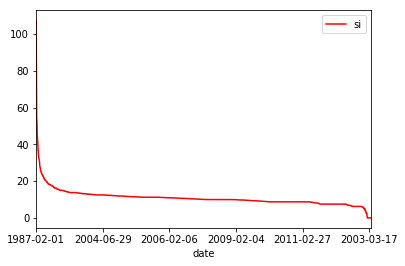

In [56]:
data[['date','si']].groupby(["date"]).median().sort_values(by='si',ascending=False).plot.line(color='r')
plt.show()

### What is Nitrogen Dioxide (NO2)

As for PM and O3, the evidence on NO2 and health comes from different sources of information, including observational epidemiology, controlled human exposures to pollutants and animal toxicology. The observational data are derived from studies outdoors where NO2 is one component of the complex mixture of different pollutants found in ambient air and from studies of NO2 exposure indoors where its sources include unvented combustion appliances.

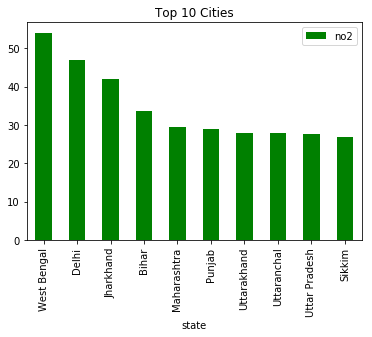

In [41]:
data[['no2','state']].groupby(["state"]).median().sort_values(by='no2',ascending=False).head(10).plot.bar(color='g',title="Top 10 Cities")
plt.show()

In [42]:
#function for calculating the AQI base on the concentration of SO2
def AQIForNO2(no2):
    if(0<=no2 and no2<=40):
        NI = ((50*no2)/(40))
    elif(41<=no2 and no2<=80):
        NI = (((100-51)*(no2-41))/(80-41))+51
    elif(81<=no2 and no2<=180):
        NI = (((200-101)*(no2-81))/(180-81))+101
    elif(181<=no2 and no2<=280):
        NI = (((300-201)*(no2-181))/(280-181))+201
    elif(281<=no2 and no2<=400):
        NI = (((400-301)*(no2-281))/(400-281))+301
    else:
        NI = (((500-401)*(no2-400))/(400))+401
    return NI

In [43]:
#including NI in dataset
data['ni']=data['no2'].apply(AQIForNO2)
df= data[['no2','ni']]
df.head()

,no2,ni
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


In [44]:
#keeping the highest (NI or SI) for AQI of the place
def chooseAQI(si,ni):
    aqi=ni
    if(si>ni):
        aqi=si
    return aqi

In [45]:
data['AQI']=data.apply(lambda x:chooseAQI(x['si'],x['ni']),axis=1)
df= data[['sampling_date','state','si','ni','AQI']]
df.head()

,sampling_date,state,si,ni,AQI
0,February - M021990,Andhra Pradesh,6.000,21.750,21.750
1,February - M021990,Andhra Pradesh,3.875,8.750,8.750
2,February - M021990,Andhra Pradesh,7.750,35.625,35.625
3,March - M031990,Andhra Pradesh,7.875,18.375,18.375
4,March - M031990,Andhra Pradesh,5.875,9.375,9.375


In [46]:
df.tail()

,sampling_date,state,si,ni,AQI
435734,15-12-15,West Bengal,25.00,54.769231,54.769231
435735,18-12-15,West Bengal,21.25,54.769231,54.769231
435736,21-12-15,West Bengal,22.50,56.025641,56.025641
435737,24-12-15,West Bengal,27.50,62.307692,62.307692
435738,29-12-15,West Bengal,25.00,57.282051,57.282051
